In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

C:\Users\simon\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\simon\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\simon\miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [4]:
# https://covid19.who.int/data
# https://health.google.com/covid-19/open-data/raw-data
# 3 methods: k-means, regression, HMMS (used to be naive bayes)

In [114]:
# reading in COVID-19 datasets
dem_df = pd.read_csv('../data/demographics.csv')
eco_df = pd.read_csv('../data/economy.csv')
epi_df = pd.read_csv('../data/epidemiology.csv')
vac_df = pd.read_csv('../data/vaccinations.csv')
hos_df = pd.read_csv('../data/hospitalizations.csv')
gov_df = pd.read_csv('../data/oxford-government-response.csv')
idx_df = pd.read_csv('../data/index.csv')

In [6]:
# viewing datasets
dem_df.head(3)

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0


In [7]:
eco_df.head(3)

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index
0,AD,3.154058e+09,40886.0,NaN
1,AE,4.211423e+11,43103.0,0.659
2,AF,1.910135e+10,502.0,0.389


In [8]:
epi_df.head(3)

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [9]:
vac_df.head(3)

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2021-01-25,AD,NaN,576.0,NaN,NaN,NaN,576.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,AD,460.0,1036.0,NaN,NaN,460.0,1036.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-10,AD,255.0,1291.0,NaN,NaN,255.0,1291.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
idx_df.head(3)

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0


In [11]:
idx_df[['country_name']]

,country_name
0,Andorra
1,United Arab Emirates
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
22958,South Africa
22959,South Africa
22960,South Africa
22961,Zambia


In [12]:
idx_df.loc[idx_df['country_name'] == 'United States of America']

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
19557,US,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,US,USA,0
19558,US_AK,ChIJG8CuwJzfAFQRNduKqSde27w,Q797,geoId/02,US,United States of America,AK,Alaska,NaN,NaN,NaN,NaN,US,USA,1
19559,US_AK_02013,ChIJ7a-UgVuW_lYRjTetzbIWL48,Q504371,geoId/02013,US,United States of America,AK,Alaska,02013,Aleutians East,NaN,NaN,US,USA,2
19560,US_AK_02016,ChIJI9ivbI1Pg1cRg8d4nlGjGVU,Q185533,geoId/02016,US,United States of America,AK,Alaska,02016,Aleutians West,NaN,NaN,US,USA,2
19561,US_AK_02020,ChIJQT-zBHaRyFYR42iEp1q6fSU,Q39450,geoId/02020,US,United States of America,AK,Alaska,02020,Anchorage Municipality,NaN,NaN,US,USA,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22837,US_WY_56037,ChIJEVZf4rRTWocRoqATF0f_rnA,Q484194,geoId/56037,US,United States of America,WY,Wyoming,56037,Sweetwater County,NaN,NaN,US,USA,2
22838,US_WY_56039,ChIJV3wGpVVrUlMR3m18oGf5rvk,Q488912,geoId/56039,US,United States of America,WY,Wyoming,56039,Teton County,NaN,NaN,US,USA,2
22839,US_WY_56041,ChIJR4w4T5CnUYcRvTPRgMmXumM,Q483973,geoId/56041,US,United States of America,WY,Wyoming,56041,Uinta County,NaN,NaN,US,USA,2
22840,US_WY_56043,ChIJIXR5_L9BS1MRLvs8KUxeZC8,Q112846,geoId/56043,US,United States of America,WY,Wyoming,56043,Washakie County,NaN,NaN,US,USA,2


In [13]:
# get the US data
us_epi_df = epi_df.loc[epi_df['location_key'] == 'US']
us_vac_df = vac_df.loc[vac_df['location_key'] == 'US']

In [14]:
us_ev_df = us_epi_df.merge(us_vac_df, on='date', how='inner')

In [15]:
us_ev_df

,date,location_key_x,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2020-12-13,US,177830.0,2021.0,NaN,1495092.0,16119805.0,287276.0,NaN,228772064.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-14,US,195630.0,1996.0,NaN,1946701.0,16315435.0,289272.0,NaN,230718765.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-15,US,197440.0,2724.0,NaN,2078178.0,16512875.0,291996.0,NaN,232796943.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-16,US,237037.0,3374.0,NaN,2053475.0,16749912.0,295370.0,NaN,234850418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-17,US,242528.0,3316.0,NaN,2022937.0,16992440.0,298686.0,NaN,236873355.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2022-09-10,US,19715.0,51.0,NaN,NaN,92225201.0,1003766.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
637,2022-09-11,US,16742.0,10.0,NaN,NaN,92241943.0,1003776.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
638,2022-09-12,US,60728.0,213.0,NaN,NaN,92302671.0,1003989.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
639,2022-09-13,US,54413.0,460.0,NaN,NaN,92357092.0,1004449.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='date', ylabel='cumulative_confirmed'>

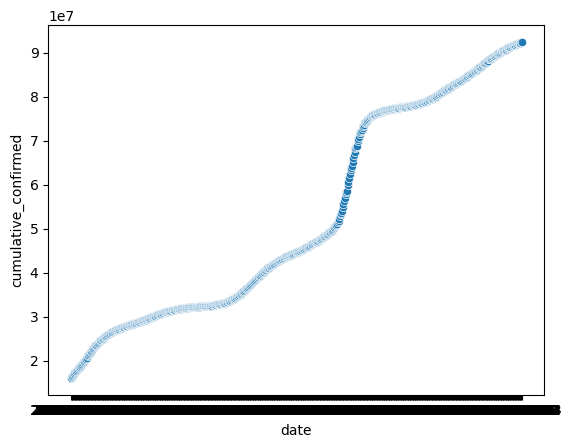

In [16]:
sns.scatterplot(data=us_ev_df, x="date", y="cumulative_confirmed")
#ax.xaxis.set_major_formatter(dates.DateFormatter("%d"))

### Linear regression

In [17]:
# use index as x, proxy for date, try to estimate y which is cumulative confirmed

In [18]:
indices = us_ev_df.index.values
covid_cases = us_ev_df['cumulative_confirmed'].values

In [19]:
def estimate_coefficients(x, y):
    num_dates = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
  
    cross_dev = np.sum(y*x) - (num_dates * y_mean * x_mean)
    sum_sq_x = np.sum(x*x) - (num_dates * x_mean * x_mean)
  
    b1 = cross_dev / sum_sq_x
    b0 = y_mean - b1*x_mean
  
    return (b0, b1)

In [20]:
us_ev_df

,date,location_key_x,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2020-12-13,US,177830.0,2021.0,NaN,1495092.0,16119805.0,287276.0,NaN,228772064.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-14,US,195630.0,1996.0,NaN,1946701.0,16315435.0,289272.0,NaN,230718765.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-15,US,197440.0,2724.0,NaN,2078178.0,16512875.0,291996.0,NaN,232796943.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-16,US,237037.0,3374.0,NaN,2053475.0,16749912.0,295370.0,NaN,234850418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-17,US,242528.0,3316.0,NaN,2022937.0,16992440.0,298686.0,NaN,236873355.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2022-09-10,US,19715.0,51.0,NaN,NaN,92225201.0,1003766.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
637,2022-09-11,US,16742.0,10.0,NaN,NaN,92241943.0,1003776.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
638,2022-09-12,US,60728.0,213.0,NaN,NaN,92302671.0,1003989.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
639,2022-09-13,US,54413.0,460.0,NaN,NaN,92357092.0,1004449.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
us_ev_df['cumulative_persons_fully_vaccinated_janssen'].max()

17094523.0

In [23]:
vaccs_raw = us_ev_df['cumulative_persons_fully_vaccinated_janssen'].values
covid_cases_raw = us_ev_df['cumulative_confirmed'].values

len(~np.isnan(vaccs_raw))
# vaccs = vaccs_raw[~np.isnan(vaccs_raw)]
covid_cases = covid_cases_raw[~np.isnan(vaccs_raw)]

In [24]:
us_ev_df['log_vacc'] = np.log(us_ev_df['cumulative_persons_fully_vaccinated_janssen'])
us_ev_df['log_cases'] = np.log(us_ev_df['cumulative_confirmed'])

<AxesSubplot: xlabel='cumulative_persons_fully_vaccinated_janssen', ylabel='log_cases'>

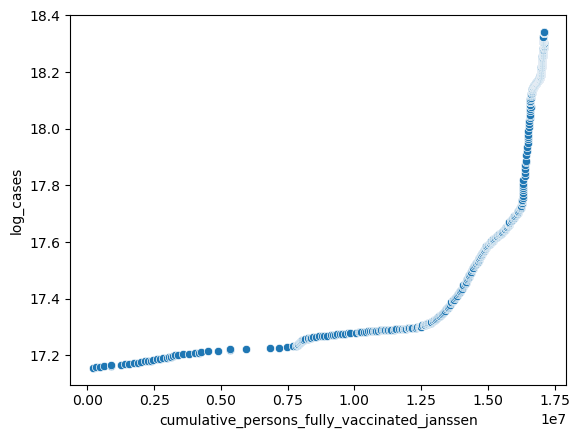

In [25]:
sns.scatterplot(data=us_ev_df, x="cumulative_persons_fully_vaccinated_janssen", y="log_cases")

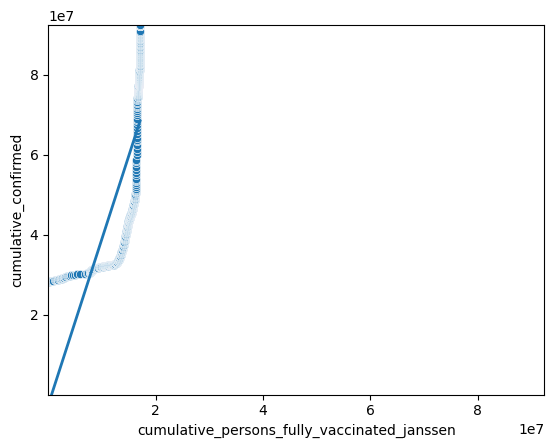

In [26]:
fig, ax = plt.subplots()
sns.scatterplot(data=us_ev_df, ax=ax, x="cumulative_persons_fully_vaccinated_janssen", y="cumulative_confirmed")
ax.set_xlim(1,us_ev_df['cumulative_confirmed'].max())
ax.set_ylim(1,us_ev_df['cumulative_confirmed'].max())

vaccs_raw = us_ev_df['cumulative_persons_fully_vaccinated_janssen'].values
covid_cases_raw = us_ev_df['cumulative_confirmed'].values

vaccs = vaccs_raw[~np.isnan(vaccs_raw)]
covid_cases = covid_cases_raw[~np.isnan(vaccs_raw)]

#print(vaccs)

b0, b1 = estimate_coefficients(vaccs, covid_cases)
y_vals = vaccs * b1 + b0
plt.plot(vaccs, y_vals, linewidth=2)

plt.show()

In [27]:
b0, b1 = estimate_coefficients(indices, covid_cases)
print(b0)
print(b1)

ValueError: operands could not be broadcast together with shapes (541,) (641,) 

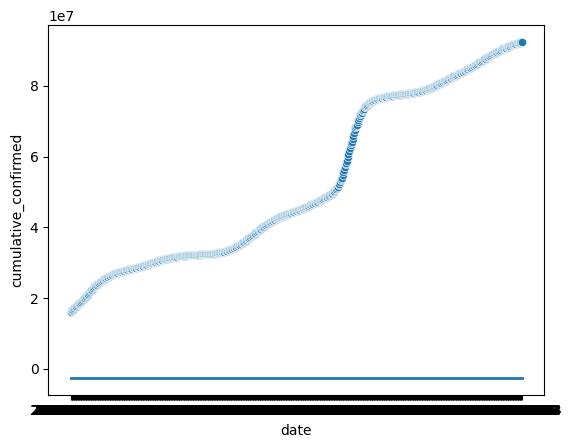

In [28]:
y_vals = indices * b1 + b0
# print(y)
sns.scatterplot(data=us_ev_df, x="date", y="cumulative_confirmed")
plt.plot(us_ev_df['date'], y_vals, linewidth=2)

### Clustering

In [223]:
# reading in COVID-19 datasets
dem_df = pd.read_csv('../data/demographics.csv')
eco_df = pd.read_csv('../data/economy.csv')
epi_df = pd.read_csv('../data/epidemiology.csv')
vac_df = pd.read_csv('../data/vaccinations.csv')
hos_df = pd.read_csv('../data/hospitalizations.csv')
gov_df = pd.read_csv('../data/oxford-government-response.csv')
idx_df = pd.read_csv('../data/index.csv')

In [224]:
# start here!
date = '2021-12-31'
dem_df['location_key'] = dem_df['location_key'].str.slice(0,2)
dem_df_agg = dem_df.groupby(['location_key']).sum()
#dem_df_agg

In [254]:
def select_date_for_dfs(gov_df, epi_df, vac_df, hos_df, date):
    gov_day = (gov_df.loc[gov_df['date'] == date]).drop('date', axis=1)
    epi_day = (epi_df.loc[epi_df['date'] == date]).drop('date', axis=1)
    vac_day = (vac_df.loc[vac_df['date'] == date]).drop('date', axis=1)
    hos_day = (hos_df.loc[hos_df['date'] == date]).drop('date', axis=1)
    gov_day['location_key'] = gov_day['location_key'].str.slice(0,2)
    gov_day_agg = gov_day.groupby(['location_key']).mean()
    #gov_day_agg
    epi_day['location_key'] = epi_day['location_key'].str.slice(0,2)
    epi_day_agg = epi_day.groupby(['location_key']).sum()
    #epi_day_agg
    vac_day['location_key'] = vac_day['location_key'].str.slice(0,2)
    vac_day_agg = vac_day.groupby(['location_key']).sum()
    #vac_day_agg
    hos_day['location_key'] = hos_day['location_key'].str.slice(0,2)
    hos_day_agg = hos_day.groupby(['location_key']).sum()
    #hos_day_agg
    
    # checkpoint dataset
#     covid_agg_unnorm_df = epi_day_agg.merge(vac_day_agg.merge(hos_day_agg, on='location_key', how='inner'), on='location_key', how='inner')
#     covid_agg_unnorm_df = covid_agg_unnorm_df.merge(dem_df_agg, on='location_key', how='inner')
#     covid_agg_unnorm_df
    
    #covid_agg_unnorm_df = epi_day_agg.merge(vac_day_agg.merge(hos_day_agg, on='location_key', how='inner'), on='location_key', how='inner')
    covid_agg_unnorm_df = epi_day_agg.merge(dem_df_agg, on='location_key', how='inner') 
    
    return covid_agg_unnorm_df

In [268]:
x = select_date_for_dfs(gov_df, epi_df, vac_df, hos_df, '2020-12-31')

In [271]:
thomas = normalize_dfs(x, '2020-12-31')

In [284]:
def normalize_dfs(covid_agg_unnorm_df, date):
    covid_agg_unnorm_df = select_date_for_dfs(gov_df, epi_df, vac_df, hos_df, date)
    #covid_selected_df = covid_agg_unnorm_df[['cumulative_confirmed', 'cumulative_deceased', 'cumulative_hospitalized_patients', 'new_confirmed', 'new_deceased', 'population']]
    covid_selected_df = covid_agg_unnorm_df[['new_confirmed', 'new_deceased', 'population']]
    for i in range(covid_selected_df.shape[1] - 1):
        covid_selected_df.iloc[:, i] = covid_selected_df.iloc[:, i] / covid_selected_df['population']
    covid_selected_df = covid_selected_df.drop('population', axis=1)
    covid_norm_df = covid_selected_df
    #covid_norm_df = (covid_selected_df-covid_selected_df.mean())/covid_selected_df.std()
    #covid_norm_df
    return covid_norm_df

In [282]:
# get_distance: gets the distance between a data point and a mean (208 dimensions)
# inputs: data point and mean centroid
# output: the distance
def get_distance(data_row, k_row):
    sum = 0
    for i in range(len(data_row)): #208
        sum += ((data_row[i] - k_row[i]) ** 2)
    dist = sum ** 0.5
    return dist

In [258]:
# generate_clusters: labels every HIP data point with the cluster they belong to
# inputs: HIP data and test means data
# output: list of cluster labels for each HIP data point
def generate_clusters(hip_exp, test_means, k):
    cluster_ids = []
    objective = 0.0
    
    # go through all data points
    for d_row in range(len(hip_exp)):
        dists = []
        
        # compare the distances between data point and each of the k centroids
        for k_row in range(k):
            dist = get_distance(hip_exp[d_row], test_means[k_row])
            dists.append(dist)            

        # assign data point to closest mean (centroid)
        min_dist = np.min(dists)
        objective += min_dist
        cluster_ids.append(np.where(dists == min_dist)[0][0])
    
    return cluster_ids

In [259]:
# update_means: updates the positions of the centroids
# inputs: cluster labels and HIP data
# output: the new positions of the mean centroids
def update_means(cluster_ids, hip_exp, k):
    new_means = np.zeros((k, hip_exp.shape[1]))
    
    # range through the data and take the mean, column by column,
    # by data point rows that are in the same cluster
    for j in range(hip_exp.shape[1]): #208
        
        for k_num in range(k):
            curr_list = []
            
            for i in range(len(cluster_ids)): #879
                if cluster_ids[i] == k_num:
                    curr_list.append(hip_exp[i][j])

            if len(curr_list) > 0:
                new_means[k_num][j] = np.mean(curr_list)
            
    return new_means

In [260]:
# get_objective: computes the objective value from the data, given the current centroid positions
# inputs: HIP data, updated centroid means, cluster labels for each data point
# output: the objective value
def get_objective(hip_exp, means, cluster_ids, k):
   
    objective = 0
    
    # compute objective (add up all intracluster distances, then add up those sums for each cluster)
    for k_num in range(k):
        intra_cluster_sum = 0
        for i in range(len(cluster_ids)): # 879
            if cluster_ids[i] == k_num:
                intra_cluster_sum += (get_distance(means[k_num], hip_exp[i]) ** 2)
        objective += intra_cluster_sum
    
    return objective

In [261]:
# run_k_means: run the k-means algorithm (repeatedly generating clusters and updating means
#              until centroids do not change or max iterations reached)
# inputs: HIP data and initial means
# output: cluster labels, updated means, updated objective values
def run_k_means(hip_exp, test_means, k):
    means = test_means
    count = 0
    objectives = []
    prev_cluster_ids = []
    
    # keep running k means until a stopping condition is meant
    while(True):
        count += 1
        
        # generate clusters
        cluster_ids = generate_clusters(hip_exp, means, k)
        # update means
        means = update_means(cluster_ids, hip_exp, k)
        
        # compute and track objective score
        objective = get_objective(hip_exp, means, cluster_ids, k)
        objectives.append(objective)
        
        # stopping condition: all points remain in the same cluster
        if cluster_ids == prev_cluster_ids:
            #print("BREAK: points remain in same cluster")
            break;
        
        # track previous cluster labels for stopping condition
        prev_cluster_ids = cluster_ids
    
        # stopping condition: max iterations reached
        if count == 50:
            #print("BREAK: max iteration reached")
            break
            
    return cluster_ids, means, objectives

In [262]:
def cluster_countries_for_date(gov_df, epi_df, vac_df, hos_df, date, k):
    k = 4
    covid_agg_unnorm_df = select_date_for_dfs(gov_df, epi_df, vac_df, hos_df, date)
    covid_norm_df = normalize_dfs(covid_agg_unnorm_df)
    rand_means = np.random.uniform(low=-3.0, high=3.0, size=(k,covid_norm_df.shape[1])) # 4x4 currently
    covid_mtx = covid_norm_df.to_numpy()
    k_means_results = run_k_means(covid_mtx, rand_means, k)
    clusters = k_means_results[0]
    countries = covid_norm_df.index.tolist()
    mini_idx_df = idx_df[['location_key', 'country_name']]
    d = {'date': [date] * len(countries), 'location_key': countries, 'clusters': clusters}
    clustered_countries_df = pd.DataFrame(d)
    clustered_countries_name_df = (clustered_countries_df.merge(mini_idx_df, on='location_key', how='inner'))
    return clustered_countries_name_df

In [263]:
covid_agg_unnorm_df = select_date_for_dfs(gov_df, epi_df, vac_df, hos_df, date)
covid_norm_df = normalize_dfs(covid_agg_unnorm_df, date)
covid_norm_df

,new_confirmed,new_deceased
location_key,,
AD,-0.069232,NaN
AE,-0.069232,NaN
AF,-0.069232,NaN
AG,-0.069232,NaN
AI,-0.069232,NaN
...,...,...
YE,-0.069232,NaN
YT,-0.069232,NaN
ZA,-0.069232,NaN


In [245]:
# get unique dates, sorted
dates_raw = epi_df['date'].values
_, idx = np.unique(dates_raw, return_index=True)
dates = dates_raw[np.sort(idx)]

k = 4

date = dates[0]
a = cluster_countries_for_date(gov_df, epi_df, vac_df, hos_df, date, k)
# for i in range(1,81): # note: change to len(dates) instead of hard set number of days
#     if i % 20 == 0:
#         print(i)
#     b = cluster_countries_for_date(gov_df, epi_df, vac_df, hos_df, dates[i], k)
#     a = pd.concat([a,b], ignore_index=True)
# clusters_countries_by_date = a
# clusters_countries_by_date

In [246]:
a

,date,location_key,clusters,country_name
0,2020-01-01,AR,0,Argentina
1,2020-01-01,AU,0,Australia
2,2020-01-01,BE,0,Belgium
3,2020-01-01,BR,0,Brazil
4,2020-01-01,CH,0,Switzerland
5,2020-01-01,CL,0,Chile
6,2020-01-01,CZ,0,Czech Republic
7,2020-01-01,ES,3,Spain
8,2020-01-01,FR,1,France
9,2020-01-01,GB,1,United Kingdom


In [285]:
# start here
date = '2020-04-17'
covid_agg_unnorm_df = select_date_for_dfs(gov_df, epi_df, vac_df, hos_df, date)
covid_norm_df = normalize_dfs(covid_agg_unnorm_df, date)
covid_norm_df

,new_confirmed,new_deceased
location_key,,
AD,1.294247e-05,0.000000e+00
AE,0.000000e+00,0.000000e+00
AF,1.647105e-06,1.317684e-08
AG,0.000000e+00,0.000000e+00
AI,0.000000e+00,0.000000e+00
...,...,...
YE,0.000000e+00,0.000000e+00
YT,0.000000e+00,0.000000e+00
ZA,3.654832e-06,1.151128e-08


<AxesSubplot: xlabel='new_confirmed', ylabel='new_deceased'>

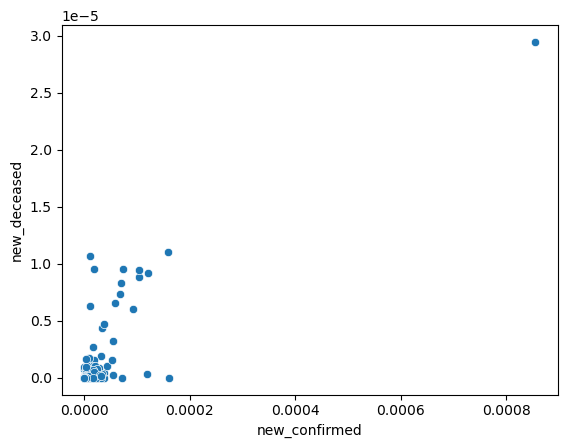

In [287]:
sns.scatterplot(data=covid_norm_df, x='new_confirmed', y='new_deceased')

In [ ]:
# stop here!

In [107]:
finals_df = clusters_countries_by_date.loc[(clusters_countries_by_date['country_name'] == 'United States of America') | (clusters_countries_by_date['country_name'] == 'Brazil')]

In [108]:
finals_df = clusters_countries_by_date.loc[(clusters_countries_by_date['country_name'] == 'Brazil')]

In [45]:
select_countries_epi_df = epi_df.loc[(epi_df['location_key'] == 'BR') | (epi_df['location_key'] == 'US')]

In [48]:
finals_cases_df = select_countries_epi_df.loc[(select_countries_epi_df['date'] >= '2020-01-01') & (select_countries_epi_df['date'] <= '2020-01-20')]

In [95]:
finals_df['clusters'].values

array([1, 0, 3, 1, 0, 1, 2, 0, 2, 0, 2, 3, 3, 3, 1, 2, 0, 3, 2, 2, 1, 0,
       1, 0, 1, 2, 1, 2, 3, 0, 1, 3, 3, 1, 1, 0, 1, 2, 0, 1, 3, 0, 1, 0,
       1, 0, 0, 1, 3, 1, 3, 2, 0, 3, 2, 1, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3,
       0, 2, 1, 1, 3, 0, 0, 3, 1, 2, 3, 1, 0, 0], dtype=int64)

<AxesSubplot: xlabel='date', ylabel='clusters'>

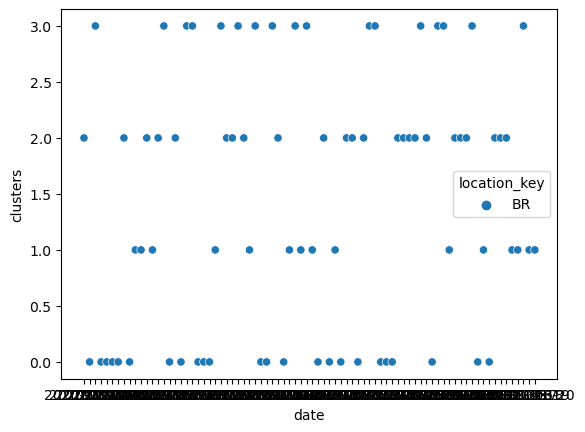

In [109]:
# try to connect the dots with lines
sns.scatterplot(data=finals_df, x="date", y="clusters", hue='location_key')

<AxesSubplot: xlabel='date', ylabel='cumulative_confirmed'>

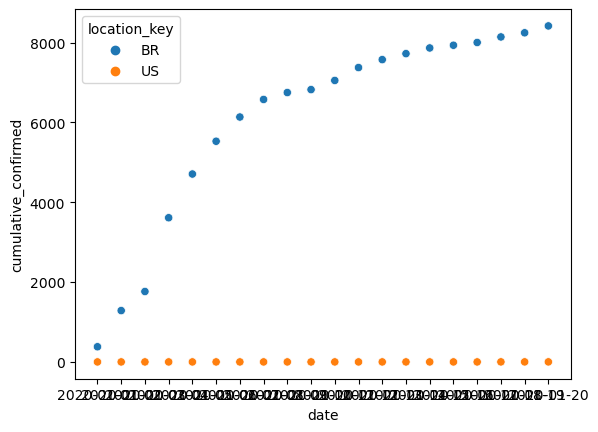

In [53]:
sns.scatterplot(data=finals_cases_df, x='date', y='cumulative_confirmed', hue='location_key')

In [ ]:
## Stop here!!!!!!!!!!

In [ ]:
# create_objectives_plot: plot objective values over iterations
# inputs: objective values from K means and title of the plot
# output: the plot itself
def create_objectives_plot(objectives, title):
    objective = objectives[len(objectives)-1]
    index_len = len(objectives) + 1
    index = list(range(1, index_len))
    plt.scatter(index, objectives)
    plt.title(str(round(objective, 1)) + " : "+ title)
    plt.xlabel("Iterations")
    plt.ylabel("Objective Score")
    return plt.plot(index, objectives)

In [ ]:
objectives = k_means_results[2]
clusters = k_means_results[0]
create_objectives_plot(objectives, "Objective Values over Iterations, K="+str(k)+", Random Means")

In [ ]:
clusters

In [ ]:
countries = covid_norm_df.index.tolist()

In [ ]:
mini_idx_df = idx_df[['location_key', 'country_name']]

In [ ]:
d = {'location_key': countries, 'clusters': clusters}
clustered_countries_df = pd.DataFrame(d)

In [ ]:
clustered_countries_df.head(2)

In [ ]:
clustered_countries_name_df = (mini_idx_df.merge(clustered_countries_df, on='location_key', how='inner'))
clustered_countries_name_df

In [ ]:
gov_day_agg_mini = gov_day_agg[['stringency_index']]
gov_day_agg_mini

In [ ]:
cluster_stringency_df = clustered_countries_name_df.merge(gov_day_agg_mini, left_on = 'location_key', right_index=True, how='inner')
cluster_stringency_df

In [ ]:
plt.scatter(cluster_stringency_df[['clusters']], cluster_stringency_df[['stringency_index']])

### Clustering (select country, go by dates)

In [117]:
# reading in COVID-19 datasets
dem_df_raw = pd.read_csv('../data/demographics.csv')
eco_df_raw = pd.read_csv('../data/economy.csv')
epi_df_raw = pd.read_csv('../data/epidemiology.csv')
vac_df_raw = pd.read_csv('../data/vaccinations.csv')
hos_df_raw = pd.read_csv('../data/hospitalizations.csv')
gov_df_raw = pd.read_csv('../data/oxford-government-response.csv')
idx_df_raw = pd.read_csv('../data/index.csv')

In [333]:
dem_df = dem_df_raw
eco_df = eco_df_raw
epi_df = epi_df_raw
vac_df = vac_df_raw
hos_df = hos_df_raw
gov_df = gov_df_raw
idx_df = idx_df_raw

In [334]:
lk = 'US'
gov_df['location_key'] = gov_df['location_key'].str.slice(0,2)
gov_df = gov_df.loc[gov_df['location_key'] == lk]
gov_df_agg = gov_df.groupby(['location_key', 'date']).mean()
#gov_day_agg
epi_df['location_key'] = epi_df['location_key'].str.slice(0,2)
epi_df = epi_df.loc[epi_df['location_key'] == lk]
epi_df_agg = epi_df.groupby(['location_key', 'date']).sum()
#epi_day_agg
vac_df['location_key'] = vac_df['location_key'].str.slice(0,2)
vac_df = vac_df.loc[vac_df['location_key'] == lk]
vac_df_agg = vac_df.groupby(['location_key', 'date']).sum()
#vac_day_agg
hos_df['location_key'] = hos_df['location_key'].str.slice(0,2)
hos_df = hos_df.loc[hos_df['location_key'] == lk]
hos_df_agg = hos_df.groupby(['location_key', 'date']).sum()
#hos_day_agg

In [335]:
# checkpoint dataset
covid_agg_unnorm_df = epi_df_agg.merge(vac_df_agg.merge(hos_df_agg, on='date', how='outer'), on='date', how='outer')
#covid_agg_unnorm_df = covid_agg_unnorm_df.merge(dem_df_agg, on='date', how='outer')
covid_agg_unnorm_mini_df = covid_agg_unnorm_df[['new_confirmed', 'new_deceased']]
covid_agg_unnorm_mini_df
covid_norm_df = (covid_agg_unnorm_mini_df-covid_agg_unnorm_mini_df.mean())/covid_agg_unnorm_mini_df.std()
covid_mtx = covid_norm_df.to_numpy()
covid_mtx

array([[-0.69114078, -1.07329551],
       [-0.69114078, -1.07329551],
       [-0.69114078, -1.07329551],
       ...,
       [-0.45446895, -0.81036779],
       [-0.76939469, -1.07329551],
       [        nan,         nan]])

In [336]:
covid_mtx2 = covid_mtx[~np.isnan(covid_mtx[:,1])]
date_list = covid_norm_df.index.tolist()
date_list2 = np.array(date_list)[~np.isnan(covid_mtx[:,1])]

In [337]:

k = 4
rand_means = np.random.uniform(low=-3.0, high=3.0, size=(k,covid_mtx.shape[1])) # 4x4 currently

k_means_results = run_k_means(covid_mtx2, rand_means, k)
clusters = k_means_results[0]
clusters

date_list = covid_norm_df.index.tolist()

# clusters = k_means_results[0]
# countries = covid_norm_df.index.tolist()
# mini_idx_df = idx_df[['location_key', 'country_name']]
d = {'date': date_list2,'clusters': clusters}
clustered_dates_df = pd.DataFrame(d)
#clustered_countries_name_df = (clustered_countries_df.merge(mini_idx_df, on='location_key', how='inner'))
# clustered_countries_name_df

In [338]:
date_list

['2020-01-01',
 '2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-05',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-11',
 '2020-01-12',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-18',
 '2020-01-19',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-

([<matplotlib.axis.YTick at 0x1ca959c4a00>,
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

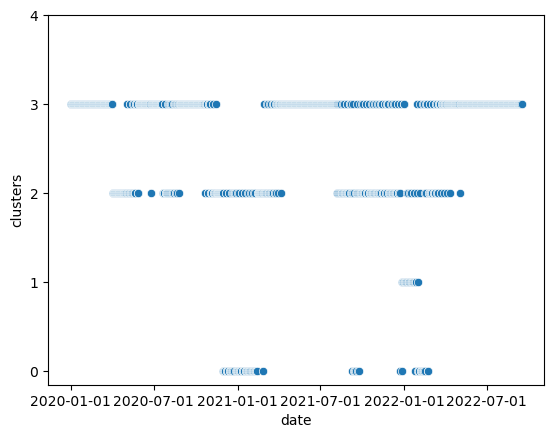

In [339]:
sns.scatterplot(data=clustered_dates_df, x='date', y='clusters')
plt.xticks(['2020-01-01', '2020-07-01', '2021-01-01', '2021-07-01', '2022-01-01', '2022-07-01'])
plt.yticks([0.0, 1.0, 2.0, 3.0, 4.0])

In [344]:
clustered_dates_df

,date,clusters
0,2020-01-01,3
1,2020-01-02,3
2,2020-01-03,3
3,2020-01-04,3
4,2020-01-05,3
...,...,...
985,2022-09-12,3
986,2022-09-13,3
987,2022-09-14,3
988,2022-09-15,3


In [357]:
epi_country = epi_df.loc[epi_df['location_key'] == lk]
epi_country_selected = epi_country[['date', 'new_confirmed', 'new_deceased']]
epi_c_s_agg = epi_country_selected.groupby(['date']).sum()
epi_c_s_agg

,new_confirmed,new_deceased
date,,
2020-01-01,0.0,0.0
2020-01-02,0.0,0.0
2020-01-03,0.0,0.0
2020-01-04,0.0,0.0
2020-01-05,0.0,0.0
...,...,...
2022-09-12,152889.0,786.0
2022-09-13,118839.0,1008.0
2022-09-14,201270.0,1698.0


In [358]:
epi_c_s_agg['clusters'] = (clustered_dates_df['clusters'].values).astype(str)

In [399]:
epi_c_s_agg

,new_confirmed,new_deceased,clusters
date,,,
2020-01-01,0.0,0.0,3
2020-01-02,0.0,0.0,3
2020-01-03,0.0,0.0,3
2020-01-04,0.0,0.0,3
2020-01-05,0.0,0.0,3
...,...,...,...
2022-09-12,152889.0,786.0,3
2022-09-13,118839.0,1008.0,3
2022-09-14,201270.0,1698.0,3


([<matplotlib.axis.XTick at 0x1caacad6b50>,
 [Text(0.0, 0, '2020-01-01'),
  Text(182.0, 0, '2020-07-01'),
  Text(366.0, 0, '2021-01-01'),
  Text(547.0, 0, '2021-07-01'),
  Text(731.0, 0, '2022-01-01'),
  Text(912.0, 0, '2022-07-01')])

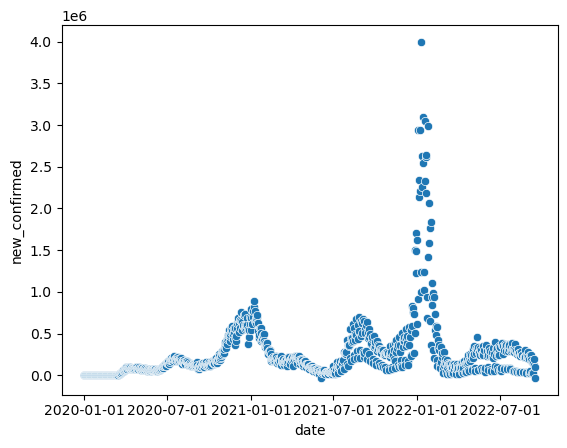

In [398]:
sns.scatterplot(data=epi_c_s_agg, x='date', y='new_confirmed', palette=palette)
plt.xticks(['2020-01-01', '2020-07-01', '2021-01-01', '2021-07-01', '2022-01-01', '2022-07-01'])

([<matplotlib.axis.XTick at 0x1cac78797c0>,
 [Text(0.0, 0, '2020-01-01'),
  Text(182.0, 0, '2020-07-01'),
  Text(366.0, 0, '2021-01-01'),
  Text(547.0, 0, '2021-07-01'),
  Text(731.0, 0, '2022-01-01'),
  Text(912.0, 0, '2022-07-01')])

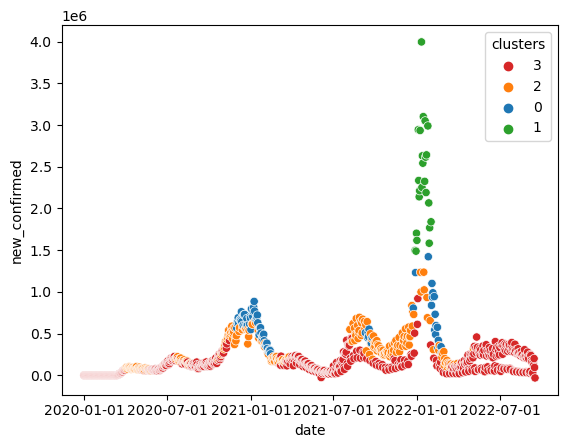

In [396]:
palette = {
    '0': 'tab:blue',
    '1': 'tab:green',
    '2': 'tab:orange',
    '3': 'tab:red',
}
sns.scatterplot(data=epi_c_s_agg, x='date', y='new_confirmed', hue='clusters', palette=palette)
plt.xticks(['2020-01-01', '2020-07-01', '2021-01-01', '2021-07-01', '2022-01-01', '2022-07-01'])

([<matplotlib.axis.XTick at 0x1caed373be0>,
 [Text(0.0, 0, '2020-01-01'),
  Text(182.0, 0, '2020-07-01'),
  Text(366.0, 0, '2021-01-01'),
  Text(547.0, 0, '2021-07-01'),
  Text(731.0, 0, '2022-01-01'),
  Text(912.0, 0, '2022-07-01')])

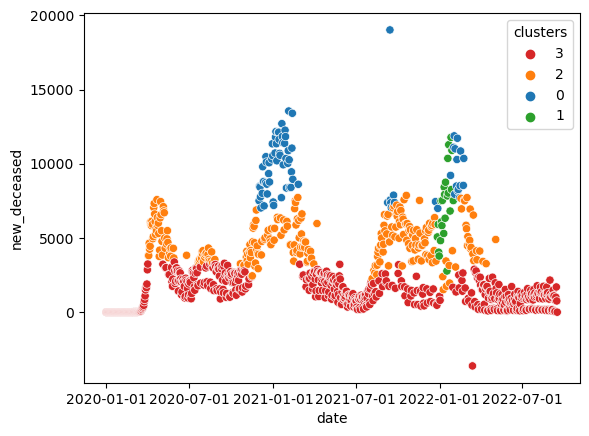

In [397]:
palette = {
    '0': 'tab:blue',
    '1': 'tab:green',
    '2': 'tab:orange',
    '3': 'tab:red',
}
sns.scatterplot(data=epi_c_s_agg, x='date', y='new_deceased', hue='clusters', palette=palette)
plt.xticks(['2020-01-01', '2020-07-01', '2021-01-01', '2021-07-01', '2022-01-01', '2022-07-01'])

In [171]:
#sns.scatterplot(data=epi_country, x='date', y='cumulative_confirmed', hue='location_key')

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
573657,2020-01-01,BR,380.0,0.0,0.0,1154.0,380.0,0.0,0.0,1154.0
573658,2020-01-02,BR,906.0,0.0,0.0,2337.0,1286.0,0.0,0.0,3491.0
573659,2020-01-03,BR,478.0,0.0,0.0,1307.0,1764.0,0.0,0.0,4798.0
573660,2020-01-04,BR,1848.0,0.0,0.0,5007.0,3612.0,0.0,0.0,9805.0
573661,2020-01-05,BR,1095.0,0.0,0.0,3459.0,4707.0,0.0,0.0,13264.0
...,...,...,...,...,...,...,...,...,...,...
5666065,2022-09-11,BR,0.0,0.0,NaN,NaN,2910.0,40.0,NaN,NaN
5666066,2022-09-12,BR,0.0,0.0,NaN,NaN,2910.0,40.0,NaN,NaN
5666067,2022-09-13,BR,0.0,0.0,NaN,NaN,2910.0,40.0,NaN,NaN
5666068,2022-09-14,BR,0.0,0.0,NaN,NaN,2910.0,40.0,NaN,NaN


In [173]:
sns.scatterplot(data=epi_country, x='date', y='new_confirmed', hue='location_key')

<AxesSubplot: xlabel='date', ylabel='new_confirmed'>

Error in callback <function _draw_all_if_interactive at 0x000001C97A267670> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C924640550> (for post_execute):


KeyboardInterrupt: 

In [322]:
dem_df = dem_df_raw
eco_df = eco_df_raw
epi_df = epi_df_raw
vac_df = vac_df_raw
hos_df = hos_df_raw
gov_df = gov_df_raw
idx_df = idx_df_raw

In [362]:
lk = 'US'
gov_df['location_key'] = gov_df['location_key'].str.slice(0,2)
gov_df = gov_df.loc[gov_df['location_key'] == lk]
gov_df_agg = gov_df.groupby(['location_key', 'date']).mean()
#gov_day_agg
epi_df['location_key'] = epi_df['location_key'].str.slice(0,2)
epi_df = epi_df.loc[epi_df['location_key'] == lk]
epi_df_agg = epi_df.groupby(['location_key', 'date']).sum()
#epi_day_agg
vac_df['location_key'] = vac_df['location_key'].str.slice(0,2)
vac_df = vac_df.loc[vac_df['location_key'] == lk]
vac_df_agg = vac_df.groupby(['location_key', 'date']).sum()
#vac_day_agg
hos_df['location_key'] = hos_df['location_key'].str.slice(0,2)
hos_df = hos_df.loc[hos_df['location_key'] == lk]
hos_df_agg = hos_df.groupby(['location_key', 'date']).sum()
#hos_day_agg

In [363]:
# checkpoint dataset
covid_agg_unnorm_df = epi_df_agg.merge(vac_df_agg.merge(gov_df_agg, on='date', how='outer'), on='date', how='outer')
#covid_agg_unnorm_df = covid_agg_unnorm_df.merge(dem_df_agg, on='date', how='outer')
covid_agg_unnorm_mini_df = covid_agg_unnorm_df[['new_confirmed', 'stringency_index']]
covid_agg_unnorm_mini_df
covid_norm_df = (covid_agg_unnorm_mini_df-covid_agg_unnorm_mini_df.mean())/covid_agg_unnorm_mini_df.std()
covid_mtx = covid_norm_df.to_numpy()
covid_mtx

array([[-0.69114078, -2.44147384],
       [-0.69114078, -2.44147384],
       [-0.69114078, -2.44147384],
       ...,
       [-0.45446895,         nan],
       [-0.76939469,         nan],
       [        nan,         nan]])

In [364]:
covid_mtx.shape

(991, 2)

In [365]:
covid_mtx2 = covid_mtx[~np.isnan(covid_mtx[:,1])]

In [366]:

date_list = covid_norm_df.index.tolist()
date_list2 = np.array(date_list)[~np.isnan(covid_mtx[:,1])]

([<matplotlib.axis.YTick at 0x1cab74fac10>,
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

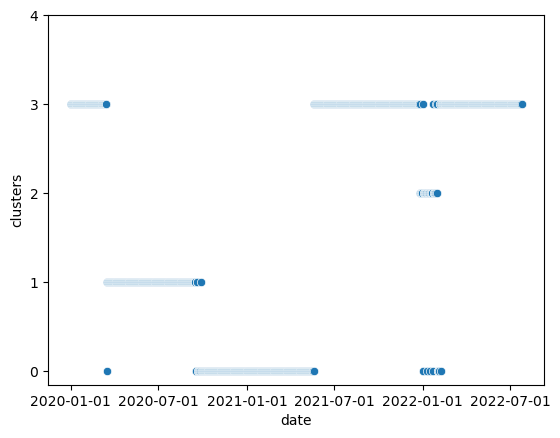

In [367]:

k = 4
rand_means = np.random.uniform(low=-3.0, high=3.0, size=(k,covid_mtx.shape[1])) # 4x4 currently

k_means_results = run_k_means(covid_mtx2, rand_means, k)
clusters = k_means_results[0]
# clusters

# date_list2

# clusters = k_means_results[0]
# countries = covid_norm_df.index.tolist()
# mini_idx_df = idx_df[['location_key', 'country_name']]
d = {'date': date_list2,'clusters': clusters}
clustered_dates_df = pd.DataFrame(d)
#clustered_countries_name_df = (clustered_countries_df.merge(mini_idx_df, on='location_key', how='inner'))
# clustered_countries_name_df
sns.scatterplot(data=clustered_dates_df, x='date', y='clusters')
plt.xticks(['2020-01-01', '2020-07-01', '2021-01-01', '2021-07-01', '2022-01-01', '2022-07-01'])
plt.yticks([0.0, 1.0, 2.0, 3.0, 4.0])

In [370]:
covid_agg_unnorm_df
covid_agg_selected = covid_agg_unnorm_df[['new_confirmed', 'stringency_index']]
covid_c_s_agg = covid_agg_selected.groupby(['date']).sum()

In [382]:
covid_stringency_final_df = covid_c_s_agg[~np.isnan(covid_mtx[:,1])]

In [383]:
covid_stringency_final_df['clusters'] = (clustered_dates_df['clusters'].values).astype(str)

([<matplotlib.axis.XTick at 0x1cac64f7730>,
 [Text(0.0, 0, '2020-01-01'),
  Text(182.0, 0, '2020-07-01'),
  Text(366.0, 0, '2021-01-01'),
  Text(547.0, 0, '2021-07-01'),
  Text(731.0, 0, '2022-01-01'),
  Text(912.0, 0, '2022-07-01')])

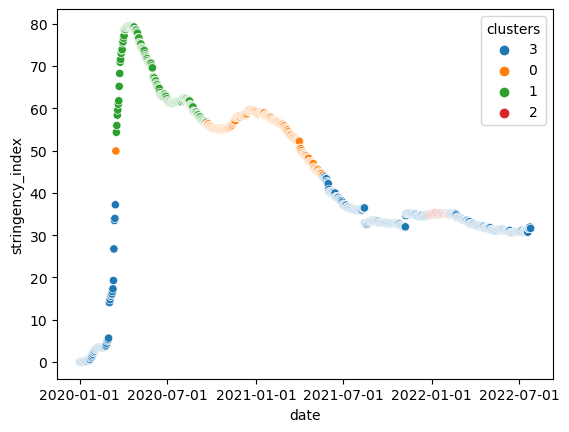

In [384]:
sns.scatterplot(data = covid_stringency_final_df, x='date', y='stringency_index', hue='clusters')
plt.xticks(['2020-01-01', '2020-07-01', '2021-01-01', '2021-07-01', '2022-01-01', '2022-07-01'], fontsize=10)

## getting true stringency values

In [390]:
# checkpoint dataset
covid_agg_unnorm_df = epi_df_agg.merge(vac_df_agg.merge(gov_df_agg, on='date', how='outer'), on='date', how='outer')
#covid_agg_unnorm_df = covid_agg_unnorm_df.merge(dem_df_agg, on='date', how='outer')
covid_agg_unnorm_mini_df = covid_agg_unnorm_df[['stringency_index']]
covid_agg_unnorm_mini_df
covid_norm_df = (covid_agg_unnorm_mini_df-covid_agg_unnorm_mini_df.mean())/covid_agg_unnorm_mini_df.std()
covid_mtx = covid_norm_df.to_numpy()

In [395]:
covid_mtx[5][1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [387]:
# checkpoint dataset
covid_agg_unnorm_df = epi_df_agg.merge(vac_df_agg.merge(gov_df_agg, on='date', how='outer'), on='date', how='outer')
#covid_agg_unnorm_df = covid_agg_unnorm_df.merge(dem_df_agg, on='date', how='outer')
covid_agg_unnorm_mini_df = covid_agg_unnorm_df[['stringency_index']]
covid_agg_unnorm_mini_df
covid_norm_df = (covid_agg_unnorm_mini_df-covid_agg_unnorm_mini_df.mean())/covid_agg_unnorm_mini_df.std()
covid_mtx = covid_norm_df.to_numpy()
covid_mtx

#covid_mtx2 = covid_mtx[~np.isnan(covid_mtx[:,1])]


date_list = covid_norm_df.index.tolist()
#date_list2 = np.array(date_list)[~np.isnan(covid_mtx[:,1])]
k = 4
rand_means = np.random.uniform(low=-3.0, high=3.0, size=(k,covid_mtx.shape[1])) # 4x4 currently

k_means_results = run_k_means(covid_mtx, rand_means, k)
clusters = k_means_results[0]
# clusters

# date_list2

# clusters = k_means_results[0]
# countries = covid_norm_df.index.tolist()
# mini_idx_df = idx_df[['location_key', 'country_name']]
d = {'date': date_list,'clusters': clusters}
clustered_dates_df = pd.DataFrame(d)
#clustered_countries_name_df = (clustered_countries_df.merge(mini_idx_df, on='location_key', how='inner'))
# clustered_countries_name_df
sns.scatterplot(data=clustered_dates_df, x='date', y='clusters')
plt.xticks(['2020-01-01', '2020-07-01', '2021-01-01', '2021-07-01', '2022-01-01', '2022-07-01'])
plt.yticks([0.0, 1.0, 2.0, 3.0, 4.0])

IndexError: index 0 is out of bounds for axis 0 with size 0

### Below is mostly WHO data

In [ ]:
#covid_agg_df = pd.read_csv('../data/aggregated.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

In [ ]:
# print(covid_agg_df.shape)
# covid_agg_df.head(3)

In [ ]:
# covid_global_df = pd.read_csv('../data/WHO-COVID-19-global-data.csv')

In [ ]:
# vacc_df = pd.read_csv('../data/vaccination-data.csv')

In [ ]:
# vacc_df.head(5)

In [ ]:
# vacc_df.loc[vacc_df['COUNTRY'] == 'United States of America']

In [ ]:
# covid_global_df.head(3)

In [ ]:
# covid_global_df.tail(3)

In [ ]:
# covid_us_df = covid_global_df.loc[covid_global_df['Country'] == 'United States of America']
# covid_us_df

In [ ]:
# vacc_df.loc[vacc_df['COUNTRY'] == 'United States of America']

In [ ]:
# get most_recent_date
#most_recent_date = covid_global_df[['Date_reported']].max().iloc[0]

In [ ]:
#covid_global_mrd = covid_global_df.loc[covid_global_df['Date_reported'] == most_recent_date]
#covid_global_mrd.head(3)

In [ ]:
#np.unique(covid_global_mrd[['WHO_region']])

In [ ]:
#sns.scatterplot(data=covid_global_mrd, x="Cumulative_cases", y="Cumulative_deaths", hue='WHO_region')

In [ ]:
#df.loc[df ['col1'] == value]